# Mouvement d'un puck attaché à deux ressorts

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

In [2]:
class MouvementPuck2Ressorts(object) :
    def __init__(self, m=0.5, k1=4.0, k2=4.0, l1=0.25, l2=0.25, deltaX=1.5, **kwargs) :
        self.m  = m # masse du puck (kg)
        self.k1 = k1 # constante d'élasticité du ressort de gauche (N/m)
        self.k2 = k2 # constante d'élasticité du ressort de droite (N/m)
        self.l1 = l1 # longueur au repos du ressort 1
        self.l2 = l2 # longueur au repos du ressort 2
        self.x1 = -(k1*l1+k2*(deltaX-l2))/(k1+k2) # position de l'extrémité du ressort 1, sur l'axe x (m)
        self.x2 = self.x1 + deltaX                # position de l'extrémité du ressort 2, sur l'axe x (m)
        
        self.periodeX = 2.0*math.pi*math.sqrt(m/(k1+k2))
        self.periodeY = 2.0*math.pi*math.sqrt(m/(k1+k2+l1/self.x1-l2/self.x2))
        self.integre = False
        self.t_fin = 0.0
        
    def integrer(self, x0=0.1, y0=0.02, vx0=0, vy0=0, t_int=5.0, dt=0.02, **kwargs) :
        cond_ini = [x0, y0, vx0, vy0]
        
        
        # Les dérivées temporelles de [x,y,vx,vy]
        def derivees(etat,t):
            x,y,vx,vy = etat
            
            dx1 = x-self.x1
            dx2 = x-self.x2
            d1 = math.hypot(dx1,y)
            d2 = math.hypot(dx2,y)
            force1 = self.k1*(d1-self.l1)
            force2 = self.k2*(d2-self.l2)
            f1_sur_d1 = force1/d1
            f2_sur_d2 = force2/d2
            fx = -f1_sur_d1*dx1 -f2_sur_d2*dx2
            fy = -(f1_sur_d1+f2_sur_d2)*y
            
            return [vx, vy, fx/self.m, fy/self.m]
        
        # On crée une grille de valeurs temporelles pour lesquelles on veut connaître l'état de la fusée.
        self.t = np.arange(0, t_int, dt)
        
        # On intégre l'équation différentielle (avec quelle précision ?).
        sol = odeint(derivees, cond_ini, self.t)
        
        # On extrait les données sur la position, la vitesse et l'accélération.
        self.x  = sol[:,0]
        self.y  = sol[:,1]
        self.vx = sol[:,2]
        self.vy = sol[:,3]
        a = np.array([derivees(sol[i],self.t[i])[2:] for i in range(len(self.t))])
        self.ax = a[:,0]
        self.ay = a[:,1]
        
        self.t_fin = self.t[-1]
        self.integre = True
        
        return self
        
    def tracerGraphiques(self) :
        if not self.integre :
            return
        
        fig = plt.figure(figsize=(18,4))
        ax = fig.add_subplot(111)
        ax.plot(self.t, self.x)
        
        fig = plt.figure(figsize=(18,4))
        ax = fig.add_subplot(111)
        ax.plot(self.t, self.y)
        
        fig = plt.figure(figsize=(18,12))
        ax = fig.add_subplot(111)
        ax.plot(self.x, self.y)
        ax.set_aspect('equal')
        
        return self

In [3]:
def traiter(cas) :
    s = situations[cas]
    MouvementPuck2Ressorts(**s).integrer(**s).tracerGraphiques()

In [20]:
situations = {
    "basique" : {
        "x0" : 0.1,
        "y0" : 0.01,
        "t_int" : 5,
    },
    "carre" : {
        "x0" : 0.1,
        "y0" : 0.1,
        "t_int" : 100,
    },
    "ample" : {
        "x0" : 1,
        "y0" : 1,
        "t_int" : 100,
    },
    "tres_ample" : {
        "x0" : 2,
        "y0" : 2,
        "t_int" : 100,
    },
    "compression_equil" : {
        "deltaX" : 0.25,
        "x0" : 0.1, 
        "y0" : math.sqrt(0.25**2-(0.5*0.25)**2), # position d'équilibre : math.sqrt(0.25**2-(0.5*0.25)**2)
        "t_int" : 30,
    },
    "compression_amusant" : {
        "deltaX" : 0.25,
        "x0" : 0.01, 
        "y0" : 1.5*math.sqrt(0.25**2-(0.5*0.25)**2), # position d'équilibre : math.sqrt(0.25**2-(0.5*0.25)**2)
        "t_int" : 30,
    },
    "compression_masque" : {
        "deltaX" : 0.25,
        "x0" : 0.1, 
        "y0" : 1.625*math.sqrt(0.25**2-(0.5*0.25)**2), # position d'équilibre : math.sqrt(0.25**2-(0.5*0.25)**2)
        "t_int" : 1200,
    },
    "rigolo" : {
        "deltaX" : 1,
        "x0" : 1,
        "y0" : 4,
        "t_int" : 300,
    },
    "different" : {
        "deltaX" : 0.66,
        "x0" : 0.5,
        "y0" : 0.4,
        "t_int" : 30,
    },
}

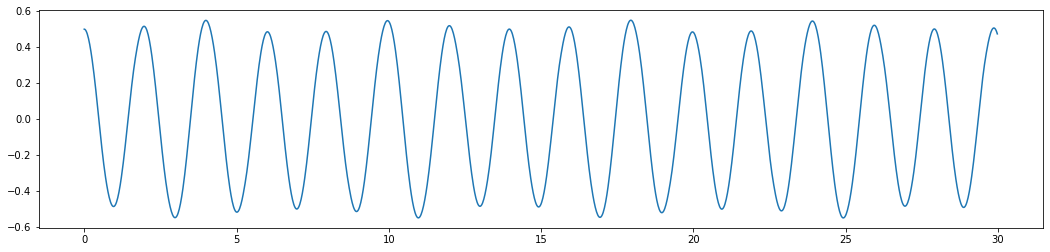

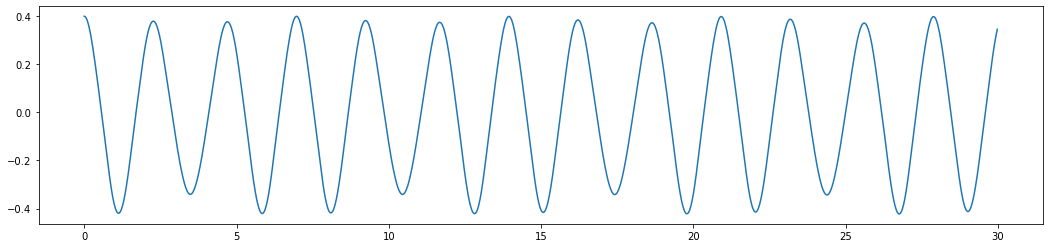

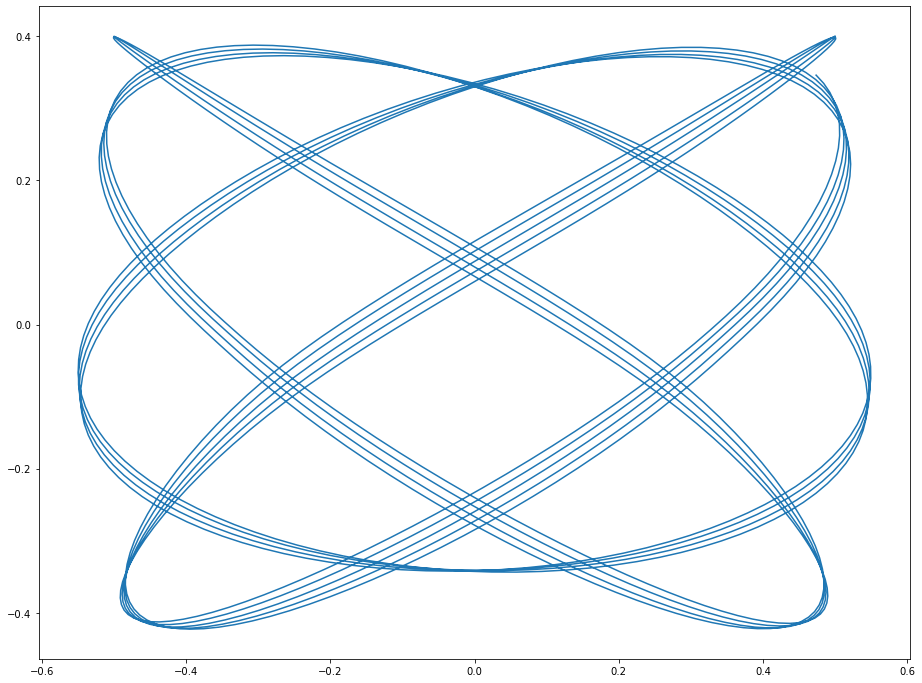

In [21]:
traiter("different")

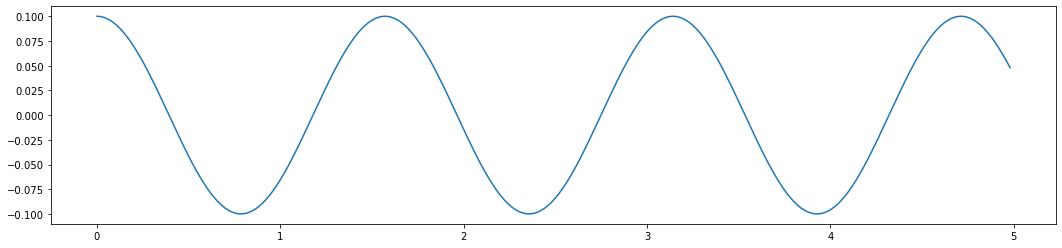

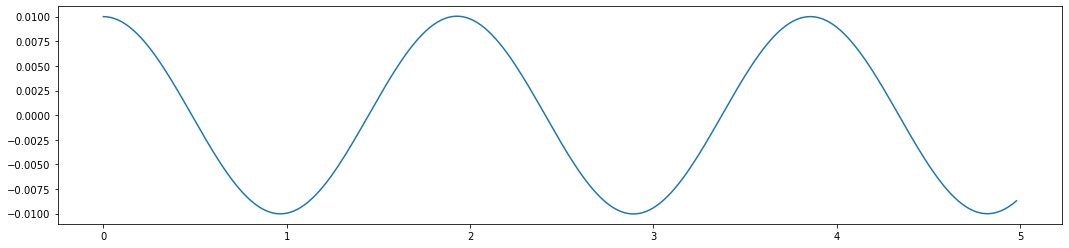

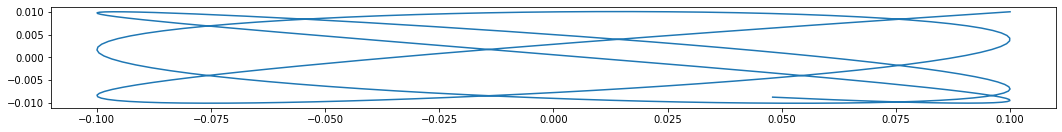

In [14]:
traiter("basique")

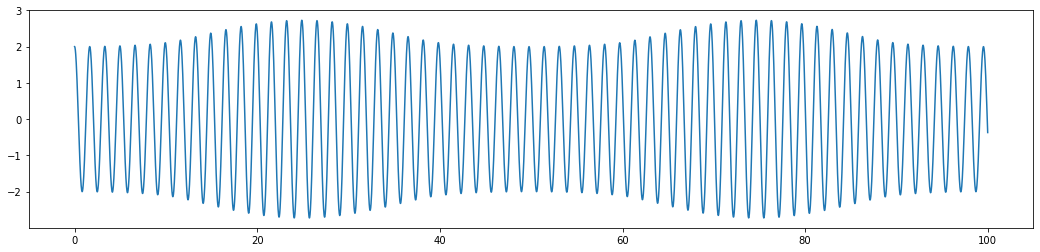

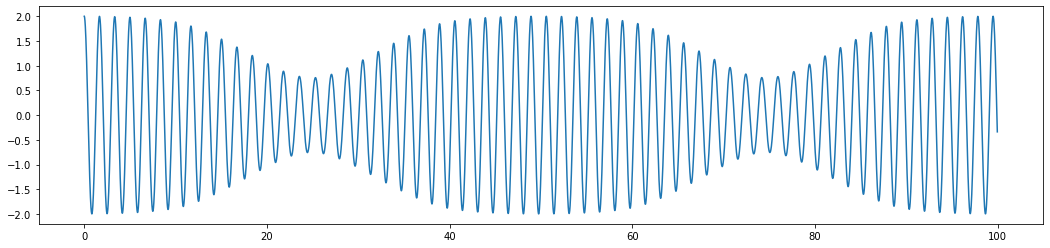

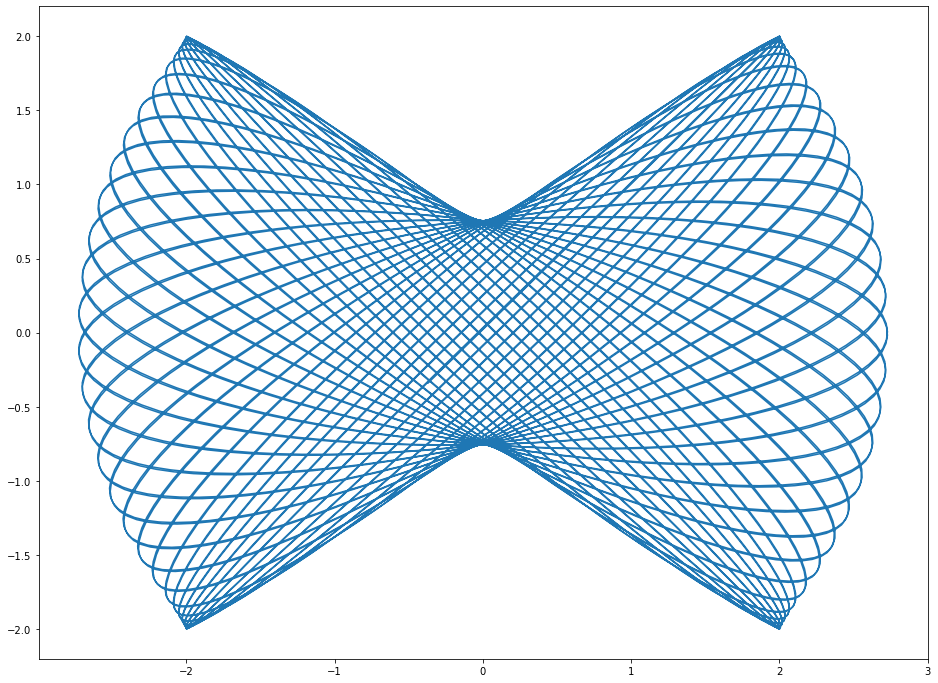

In [15]:
traiter("tres_ample")